<a href="https://colab.research.google.com/github/abharathkumarr/RAG-with-compute-optimization/blob/main/RAG_Arhitecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

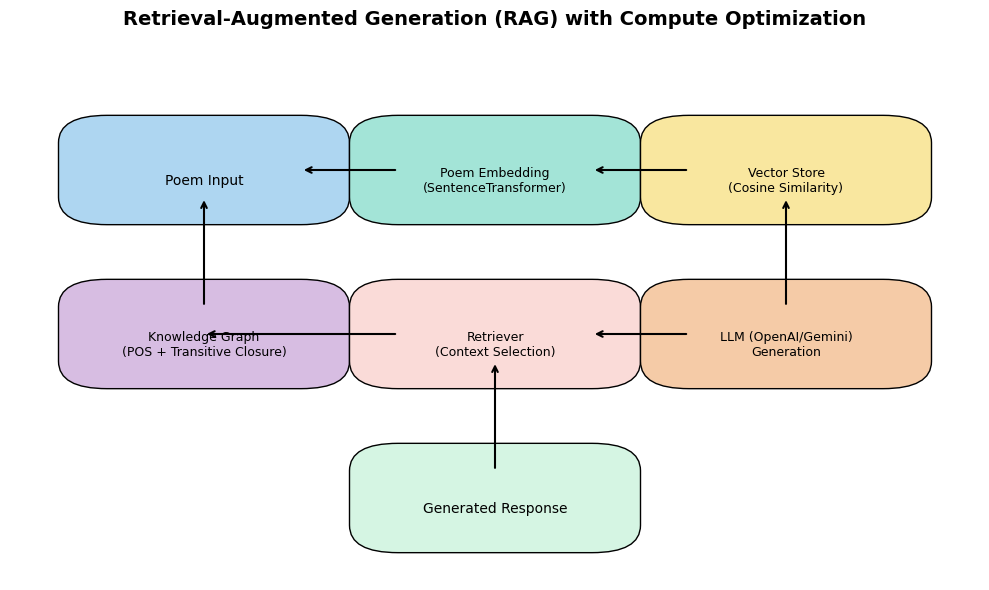

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a visual architecture diagram of the RAG pipeline
fig, ax = plt.subplots(figsize=(10, 6))

# Define boxes and flow
ax.add_patch(patches.FancyBboxPatch((0.1, 0.7), 0.2, 0.1, boxstyle="round,pad=0.05", label="Poem Input", fc="#AED6F1"))
ax.text(0.2, 0.73, "Poem Input", ha='center', va='center', fontsize=10)

ax.add_patch(patches.FancyBboxPatch((0.4, 0.7), 0.2, 0.1, boxstyle="round,pad=0.05", label="Embedding", fc="#A3E4D7"))
ax.text(0.5, 0.73, "Poem Embedding\n(SentenceTransformer)", ha='center', va='center', fontsize=9)

ax.add_patch(patches.FancyBboxPatch((0.7, 0.7), 0.2, 0.1, boxstyle="round,pad=0.05", label="Vector DB", fc="#F9E79F"))
ax.text(0.8, 0.73, "Vector Store\n(Cosine Similarity)", ha='center', va='center', fontsize=9)

# Bottom layer
ax.add_patch(patches.FancyBboxPatch((0.1, 0.4), 0.2, 0.1, boxstyle="round,pad=0.05", label="Knowledge Graph", fc="#D7BDE2"))
ax.text(0.2, 0.43, "Knowledge Graph\n(POS + Transitive Closure)", ha='center', va='center', fontsize=9)

ax.add_patch(patches.FancyBboxPatch((0.4, 0.4), 0.2, 0.1, boxstyle="round,pad=0.05", label="Retriever", fc="#FADBD8"))
ax.text(0.5, 0.43, "Retriever\n(Context Selection)", ha='center', va='center', fontsize=9)

ax.add_patch(patches.FancyBboxPatch((0.7, 0.4), 0.2, 0.1, boxstyle="round,pad=0.05", label="LLM", fc="#F5CBA7"))
ax.text(0.8, 0.43, "LLM (OpenAI/Gemini)\nGeneration", ha='center', va='center', fontsize=9)

# Final Output
ax.add_patch(patches.FancyBboxPatch((0.4, 0.1), 0.2, 0.1, boxstyle="round,pad=0.05", label="Output", fc="#D5F5E3"))
ax.text(0.5, 0.13, "Generated Response", ha='center', va='center', fontsize=10)

# Arrows
arrow_props = dict(arrowstyle="->", linewidth=1.5, color='black')
ax.annotate("", xy=(0.3, 0.75), xytext=(0.4, 0.75), arrowprops=arrow_props)
ax.annotate("", xy=(0.6, 0.75), xytext=(0.7, 0.75), arrowprops=arrow_props)

ax.annotate("", xy=(0.2, 0.7), xytext=(0.2, 0.5), arrowprops=arrow_props)
ax.annotate("", xy=(0.8, 0.7), xytext=(0.8, 0.5), arrowprops=arrow_props)

ax.annotate("", xy=(0.2, 0.45), xytext=(0.4, 0.45), arrowprops=arrow_props)
ax.annotate("", xy=(0.6, 0.45), xytext=(0.7, 0.45), arrowprops=arrow_props)

ax.annotate("", xy=(0.5, 0.4), xytext=(0.5, 0.2), arrowprops=arrow_props)

# Final setup
ax.axis('off')
ax.set_title("Retrieval-Augmented Generation (RAG) with Compute Optimization", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


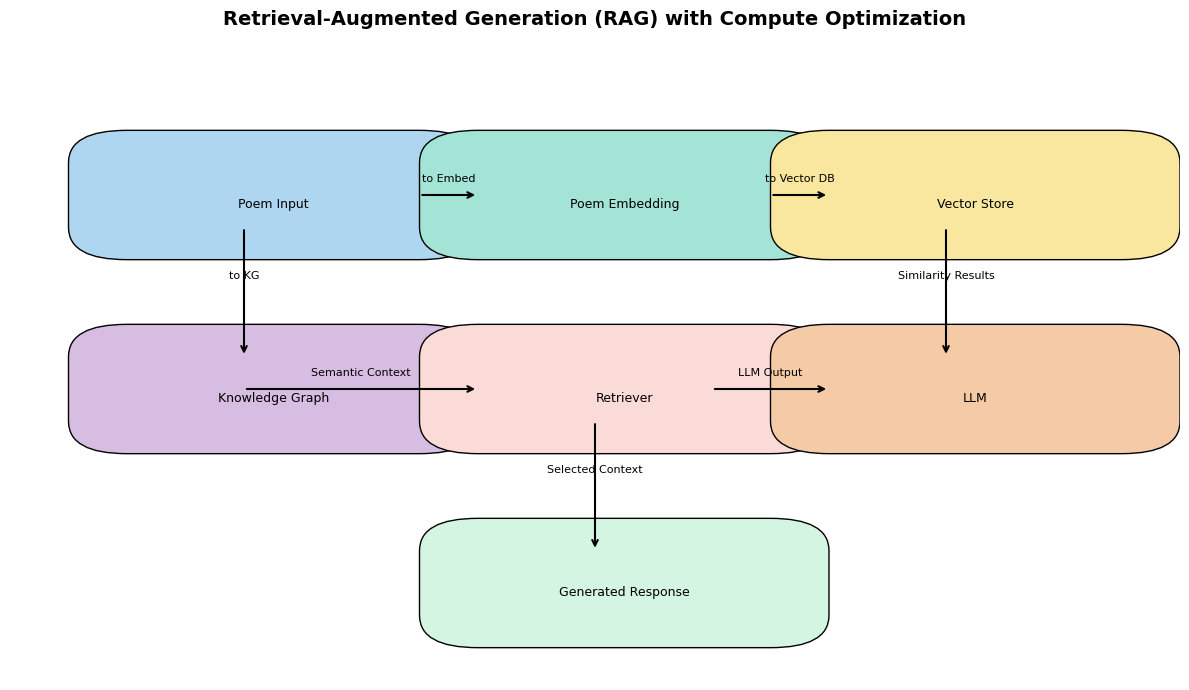

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the updated diagram with labeled arrows
fig, ax = plt.subplots(figsize=(12, 7))

# Define boxes
colors = {
    "input": "#AED6F1",
    "embedding": "#A3E4D7",
    "vector": "#F9E79F",
    "kg": "#D7BDE2",
    "retriever": "#FADBD8",
    "llm": "#F5CBA7",
    "output": "#D5F5E3"
}

positions = {
    "Poem Input": (0.1, 0.7),
    "Poem Embedding": (0.4, 0.7),
    "Vector Store": (0.7, 0.7),
    "Knowledge Graph": (0.1, 0.4),
    "Retriever": (0.4, 0.4),
    "LLM": (0.7, 0.4),
    "Generated Response": (0.4, 0.1)
}

# Draw boxes and labels
for label, (x, y) in positions.items():
    color = (
        colors["input"] if "Input" in label else
        colors["embedding"] if "Embedding" in label else
        colors["vector"] if "Vector" in label else
        colors["kg"] if "Graph" in label else
        colors["retriever"] if "Retriever" in label else
        colors["llm"] if "LLM" in label else
        colors["output"]
    )
    ax.add_patch(patches.FancyBboxPatch((x, y), 0.25, 0.1, boxstyle="round,pad=0.05", fc=color))
    ax.text(x + 0.125, y + 0.035, label, ha='center', va='center', fontsize=9)

# Define arrows with labels
arrow_props = dict(arrowstyle="->", linewidth=1.5, color='black')
text_props = dict(fontsize=8)

# Arrows + Labels
arrows = [
    ((0.35, 0.75), (0.4, 0.75), "to Embed"),                      # Input -> Embedding
    ((0.65, 0.75), (0.7, 0.75), "to Vector DB"),                  # Embedding -> Vector
    ((0.2, 0.7), (0.2, 0.5), "to KG"),                            # Input -> KG
    ((0.8, 0.7), (0.8, 0.5), "Similarity Results"),              # Vector -> LLM
    ((0.2, 0.45), (0.4, 0.45), "Semantic Context"),               # KG -> Retriever
    ((0.6, 0.45), (0.7, 0.45), "LLM Output"),                     # LLM -> Retriever
    ((0.5, 0.4), (0.5, 0.2), "Selected Context")                  # Retriever -> Output
]

for start, end, label in arrows:
    ax.annotate("", xy=end, xytext=start, arrowprops=arrow_props)
    ax.text((start[0]+end[0])/2, (start[1]+end[1])/2 + 0.02, label, **text_props, ha='center')

# Setup
ax.axis('off')
ax.set_title("Retrieval-Augmented Generation (RAG) with Compute Optimization", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
